# One Sample Z test

$$H_0:\mu==\bar{x}\\H_1:\mu\ne\bar{x}$$

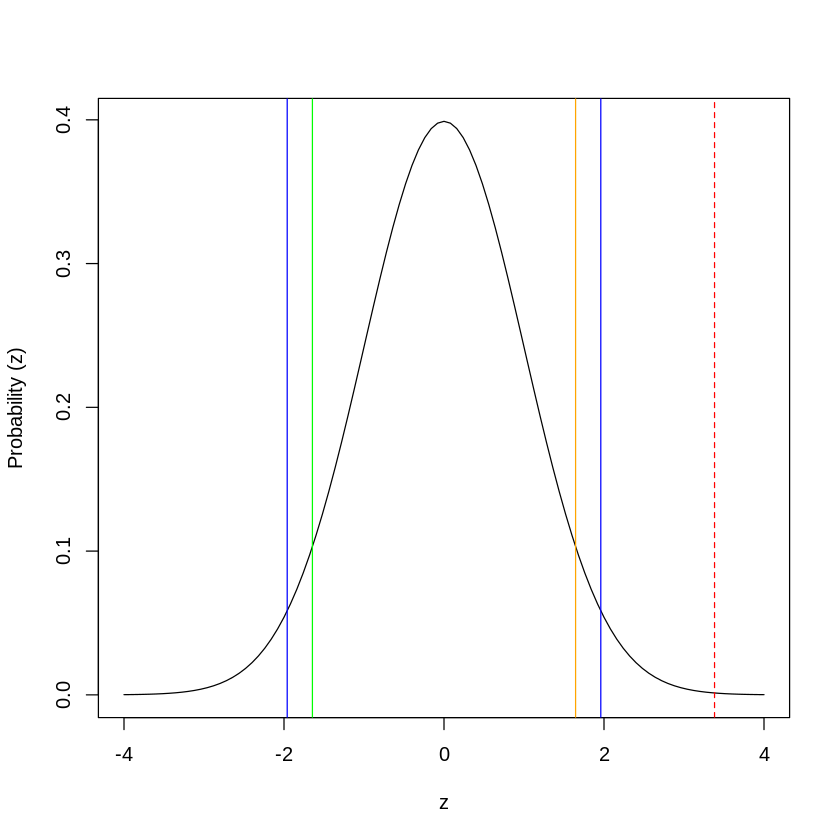

In [6]:
mu<-70.8 # population mean
sd<-8.63 # population standard deviation
xbar<-78.6 # sample mean
n=14
z = (xbar-mu)/(sd/sqrt(n))
alpha=0.05
curve(dnorm, -4, 4, xlab="z", ylab="Probability (z)")
z.HA.1 <- qnorm(alpha/2, lower.tail = FALSE)
abline(v=z.HA.1, col="blue")
abline(v=-z.HA.1, col="blue")
z.HA.2 <- qnorm(alpha)
abline(v=z.HA.2, col="green")
z.HA.3 <- qnorm(alpha, lower.tail = FALSE)
abline(v=z.HA.3, col="orange")
abline(v=z, col="red", lty=2)
upper <- pnorm(abs(z), lower.tail = FALSE)
lower <- pnorm(-abs(z), lower.tail = TRUE)
p.z.1 <- upper + lower
p.z.2 <- pnorm(z, lower.tail = TRUE)
p.z.3 <- pnorm(z, lower.tail = FALSE)


In [8]:
print(z>z.HA.1 || z < -z.HA.1)
print(z < z.HA.2) 
print(z > z.HA.3) 
print(p.z.1)
print(p.z.2)
print(p.z.3)


[1] TRUE
[1] FALSE
[1] TRUE
[1] 0.0007201275
[1] 0.9996399
[1] 0.0003600637


Since our $\bar{x}$ lies after the $\mu\pm3\sigma$ and on the right side, also by the looking at the p-value we can reject the $H_0$

# One Sample T-Test


In [9]:
mu0 <- 70.8 # population mean
sd <- 8.63 # population standard deviation
alpha=0.05 # significance level
sample_x<-rnorm(10, mean=70.8, sd=sd) # random sampling of values with the given mean and sd
tstat <- (mean(sample_x)-mu0)/(sd(sample_x)/sqrt(length(sample_x)))
HA1 <- qt(p=alpha/2, df=length(sample_x)-1, lower.tail=FALSE)
pval = pt(abs(tstat), df=length(sample_x)-1, lower.tail = FALSE) + pt(-abs(tstat), df=length(sample_x)-1, lower.tail=TRUE)
t.test(x = sample_x, mu = mu0, alpha = 0.05, alternative = 'two.sided')
t.test(x = sample_x, mu = mu0, alpha = 0.05, alternative = 'greater')




	One Sample t-test

data:  sample_x
t = 0.313, df = 9, p-value = 0.7614
alternative hypothesis: true mean is not equal to 70.8
95 percent confidence interval:
 63.57679 80.34308
sample estimates:
mean of x 
 71.95994 



	One Sample t-test

data:  sample_x
t = 0.313, df = 9, p-value = 0.3807
alternative hypothesis: true mean is greater than 70.8
95 percent confidence interval:
 65.16675      Inf
sample estimates:
mean of x 
 71.95994 


even with less number of samples we are able to test the hypothesis for the equal mean, with t-test which may not be possible with z test

# Two Sample T-Test
## Equal $\sigma$ and $\mu$

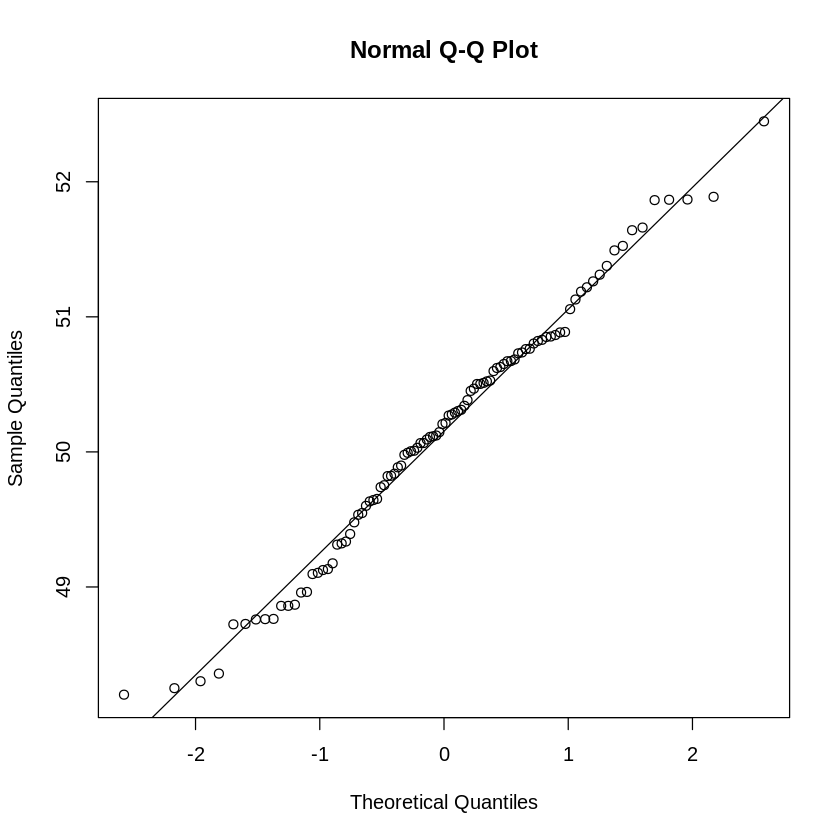

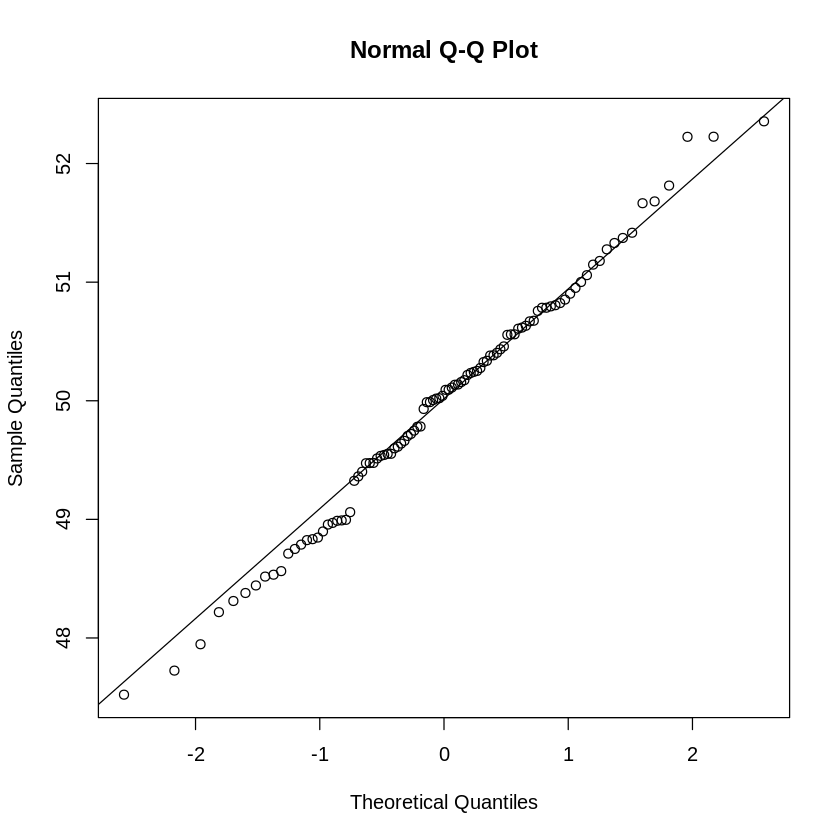

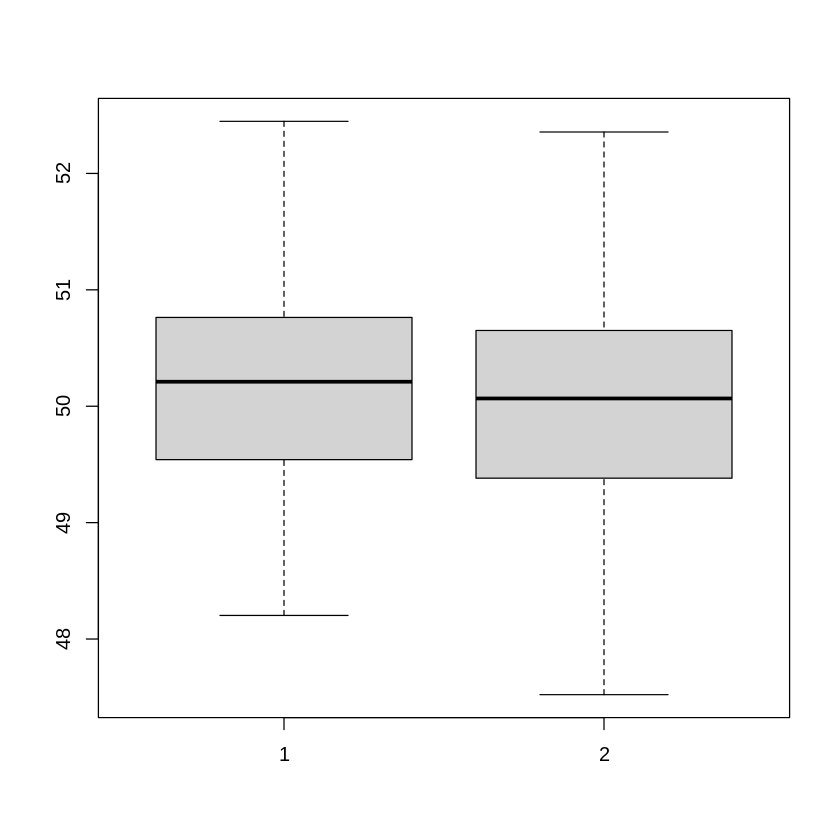

In [14]:
gene1<-rnorm(100, mean=50, sd=1)
gene2<-rnorm(100, mean=50, sd=1)
qqnorm(gene1)
qqline(gene1)
qqnorm(gene2)
qqline(gene2)
boxplot(gene1, gene2)


In [15]:
ks.test(gene1, "pnorm", mean(gene1), sd(gene1)) 
ks.test(gene2, "pnorm", mean(gene2), sd(gene2))
shapiro.test(gene1)
shapiro.test(gene2)
var.test(gene1, gene2) 
t.test(gene1, gene2, var.equal = TRUE)



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  gene1
D = 0.055424, p-value = 0.9185
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  gene2
D = 0.062548, p-value = 0.8289
alternative hypothesis: two-sided



	Shapiro-Wilk normality test

data:  gene1
W = 0.98779, p-value = 0.4931



	Shapiro-Wilk normality test

data:  gene2
W = 0.99245, p-value = 0.8528



	F test to compare two variances

data:  gene1 and gene2
F = 0.84064, num df = 99, denom df = 99, p-value = 0.3893
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5656153 1.2493823
sample estimates:
ratio of variances 
         0.8406365 



	Two Sample t-test

data:  gene1 and gene2
t = 1.3177, df = 198, p-value = 0.1891
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.08930944  0.44906027
sample estimates:
mean of x mean of y 
 50.16140  49.98152 


KS and shapiro test with reference to QQPlot indicate that our data may follow normal distribution and T-test indicate that the difference between the x and y may not be significant

Also the D and W of KS and Shaprio test of the two genes are similar which is to be expected as Shaprio test for the $\sigma$ ratio w.r.t to a normal distirbution and KS test for the CDF difference i.e $\sum$ and since both genes $\mu$ and $\sigma$ were equal it was to be expected

# Two Sample T-test
# Equal $\sigma$, Unequal $\mu$

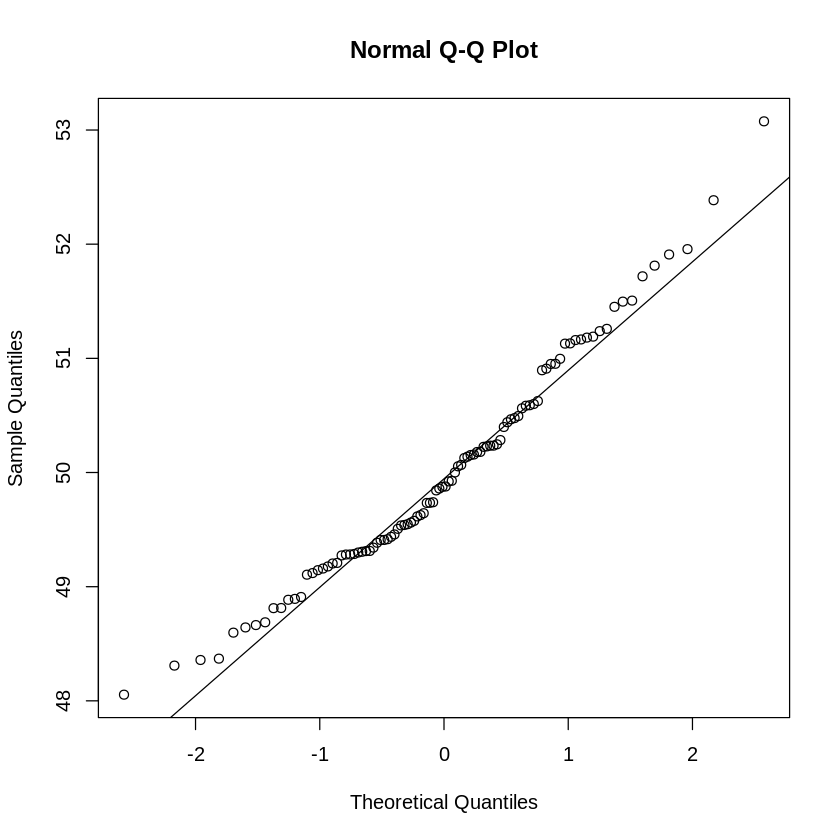

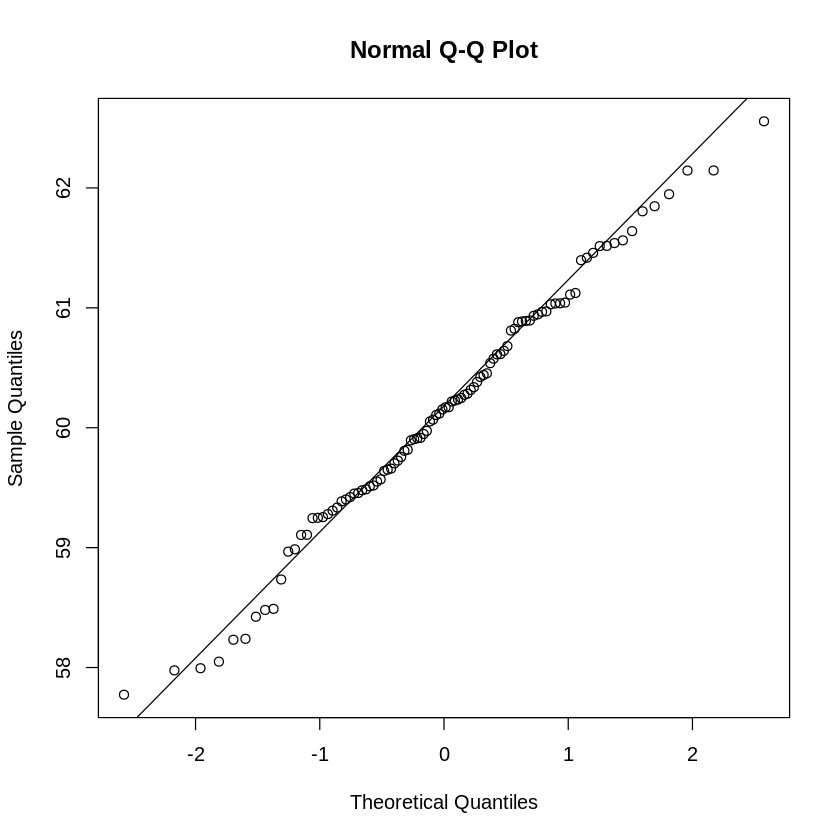

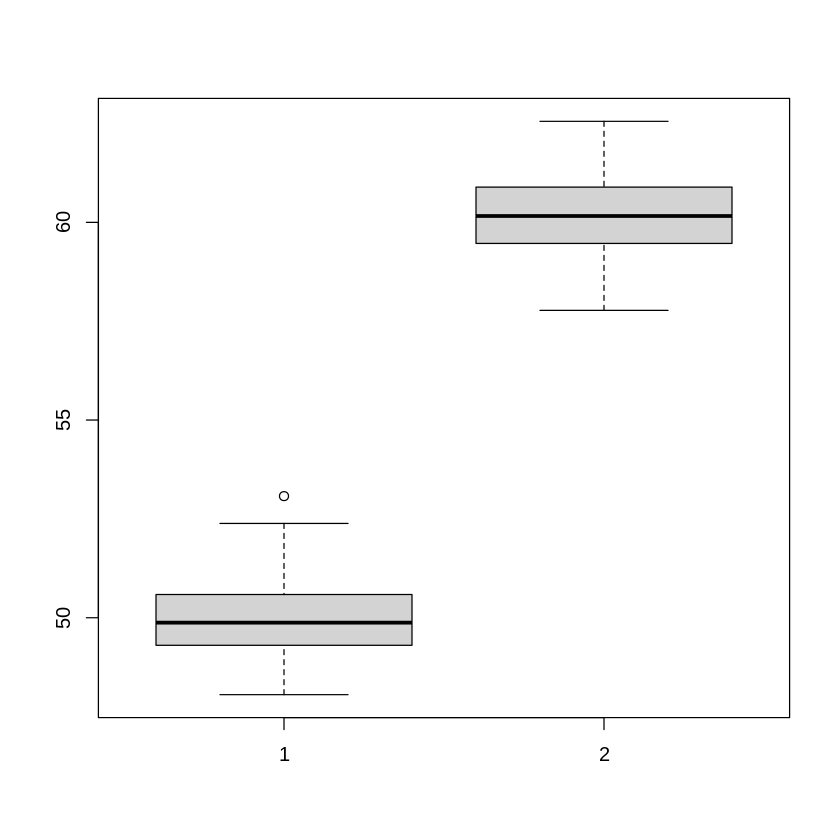

In [1]:
gene1<-rnorm(100, mean=50, sd=1)
gene2<-rnorm(100, mean=60, sd=1)
qqnorm(gene1)
qqline(gene1)
qqnorm(gene2)
qqline(gene2)
boxplot(gene1, gene2)


In [3]:
ks.test(gene1, "pnorm", mean(gene1), sd(gene1)) 
ks.test(gene2, "pnorm", mean(gene2), sd(gene2))
shapiro.test(gene1)
shapiro.test(gene2)
var.test(gene1, gene2) 
t.test(gene1, gene2, var.equal = TRUE)
t.test(gene1, gene2, var.equal = TRUE,paired=TRUE)




	Asymptotic one-sample Kolmogorov-Smirnov test

data:  gene1
D = 0.083906, p-value = 0.4821
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  gene2
D = 0.050856, p-value = 0.9582
alternative hypothesis: two-sided



	Shapiro-Wilk normality test

data:  gene1
W = 0.97589, p-value = 0.06338



	Shapiro-Wilk normality test

data:  gene2
W = 0.99014, p-value = 0.6758



	F test to compare two variances

data:  gene1 and gene2
F = 0.90489, num df = 99, denom df = 99, p-value = 0.62
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6088476 1.3448779
sample estimates:
ratio of variances 
         0.9048899 



	Two Sample t-test

data:  gene1 and gene2
t = -71.873, df = 198, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.41578  -9.85948
sample estimates:
mean of x mean of y 
 50.00221  60.13985 



	Paired t-test

data:  gene1 and gene2
t = -76.246, df = 99, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -10.40145  -9.87381
sample estimates:
mean difference 
      -10.13763 


Similar to previous here both test for the normality indicate towards normal distirbution but due to difference in $\mu$ the D of KS of both genes is difference but since they both have equal $\sigma$ the shapiro test's W is similar, also both paired and unparied T-Test indicate towards that these two distibrution may not be from same population 

# Non-Parametrix Test
## One Sample Test

In [11]:
x<-c(0.25, 0.5, 0.81, 0.82, 0.84, 0.95)
mu = 0.4
b=sum(x>mu)
print(b)
2*pbinom(b-1, 6, p=0.5, lower.tail = F)
pbinom(b-1, 6, p=0.5, lower.tail = F)
wilcox.test(x, mu=mu)


[1] 5


[1] 0.21875

[1] 0.109375


	Wilcoxon signed rank exact test

data:  x
V = 19, p-value = 0.09375
alternative hypothesis: true location is not equal to 0.4


This indicate that our sample and population median is not significantally different

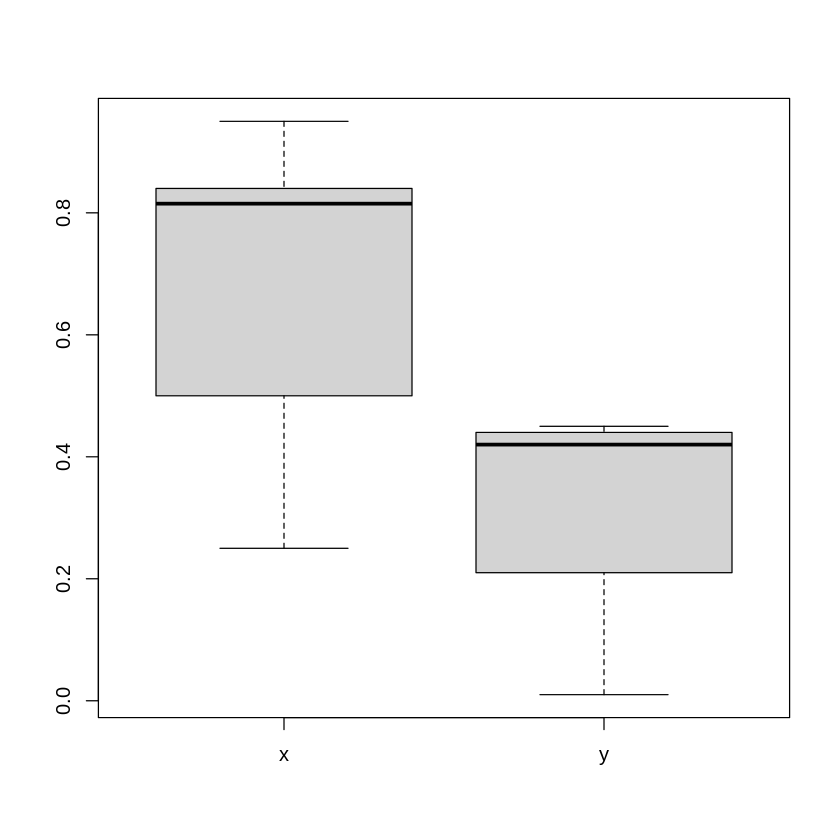

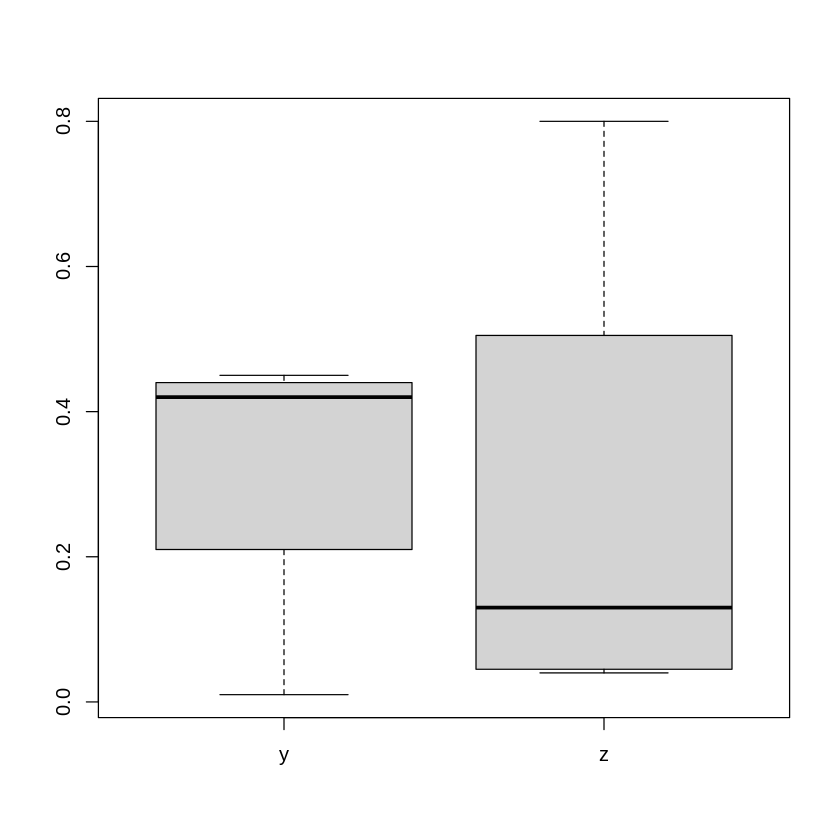

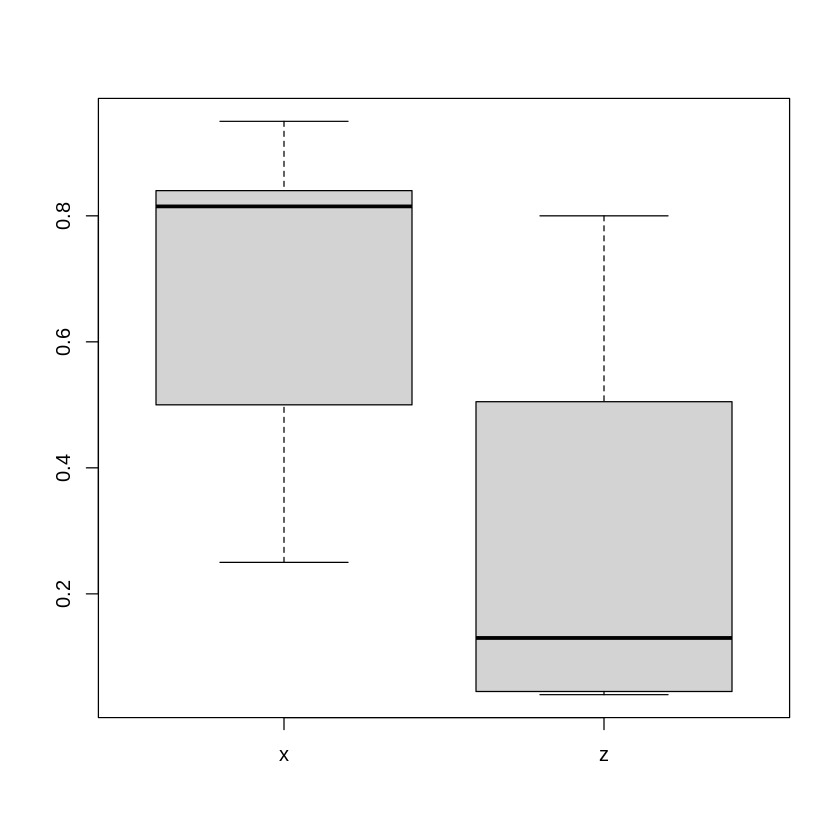

In [16]:
y<-c(0.01, 0.41, 0.43, 0.45)
z<-c(0.04, 0.05, 0.21, 0.8)
boxplot(x, y,names=c('x','y'))
boxplot(y, z,names=c('y','z'))
boxplot(x, z,names=c('x','z'))

In [18]:
wilcox.test(x, y)
wilcox.test(y, x)
wilcox.test(y, z)
wilcox.test(x, z)

wilcox.test(z, x, conf.int = T)



	Wilcoxon rank sum exact test

data:  x and y
W = 21, p-value = 0.06667
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  y and x
W = 3, p-value = 0.06667
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  y and z
W = 9, p-value = 0.8857
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  x and z
W = 22, p-value = 0.0381
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  z and x
W = 2, p-value = 0.0381
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.80 -0.01
sample estimates:
difference in location 
                 -0.53 


These shows that only significant difference in median is between x and z dataset where as all other are not.

In [8]:
x<-c(0.25, 0.5, 0.81, 0.82, 0.84, 0.95)
y<-c(0.01, 0.41, 0.43, 0.5)
wilcox.test(y, x)

Warning message in wilcox.test.default(y, x):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  y and x
W = 3.5, p-value = 0.08712
alternative hypothesis: true location shift is not equal to 0


Due to having ties in the dataset, we were not able to compute exact p value but these also shows same result as previous one that x and y dataset are not that different in there median value 


In [9]:
x<-c(0.25, 0.5, 0.81, 0.82, 0.84, 0.95)
y<-c(0.01, 0.41, 0.43, 0.5, 0.6, 0.8)
wilcox.test(x, y, paired = TRUE)

Warning message in wilcox.test.default(x, y, paired = TRUE):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  x and y
V = 21, p-value = 0.03552
alternative hypothesis: true location shift is not equal to 0


But when we consider them to be paired the difference between them is found to be significant this may be due to large variation in x dataset as compare to y

In [10]:
diff<-c(x-y) 
diff<-diff[diff!=0] 
diff.rank <- rank(abs(diff)) 
diff.rank.sign<-diff.rank * sign(diff) 
sum(diff.rank.sign[diff.rank.sign>0])

[1] 21